In [ ]:
WE2504831

# P467-2022 Quiz-1
7 Feb, 2022
Abhishek Anil Deshmukh - 1811004

Note: next 4 blocks are helper functions I created to avoid redundance throughout the file, skip the next 4 code-blocks to get to the questions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import root
from scipy.misc import derivative

In [2]:
def stream_plot(f, x_range=(0, 10), y_range=(-5, 5), density=1, x_scale=20, xlabel="t(s)", ylabel="", title="", args=[]):
    def function(x):
        return f(x, *args)
    """makes and shows a stream plot for the given function with other beautification parameters"""
    u = np.ones(((x_range[1]-x_range[0])*10, (y_range[1]-y_range[0])*10)).T*x_scale
    v = function(np.repeat([np.arange(*y_range, 0.1)], 100, axis=0)).T
    plt.streamplot(*np.meshgrid(np.arange(*x_range, 0.1), np.arange(*y_range, 0.1)), u, v, density=density)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.show()

In [3]:
def vector_field(f, x_range, title="", xlabel="$x$", ylabel="$\dot{x}$", root_estimates=[-1, 1], args=[], arrows=[], fp=True):
    """makes and shows the vector field for the given function, with other beautification parameters"""
    # setup
    def function(x):
        return f(x, *args)
    x = np.linspace(*x_range, 100)
                
    # plotting the function
    plt.plot(x, function(x))
    
    if fp:
        # finding and classifying fixed point
        fixed_points = root(function, root_estimates, method="lm")["x"]
        fixed_points = set(fixed_points) # removes repetition
        stable = []
        unstable = []
        semi_stable = []
        for fixed_point in fixed_points:
            deri = derivative(function, fixed_point, dx=0.001)
            if deri > 0:
                unstable.append(fixed_point)
            elif deri < 0:
                stable.append(fixed_point)
            else:
                semi_stable.append(fixed_point)


        # drawing fixed points
        if len(stable) > 0:
            plt.scatter(stable, np.zeros(len(stable)), label=f"{len(stable)} stable fixed points")    
            print(f"stable fixed points: {stable}")
        if len(unstable) > 0:
            plt.scatter(unstable, np.zeros(len(unstable)), label=f"{len(unstable)} unstable fixed points")
            print(f"unstable fixed points: {unstable}")
        if len(semi_stable) > 0:
            plt.scatter(semi_stable, np.zeros(len(semi_stable)), label=f"{len(semi_stable)} semi-stable fixed points")
            print(f"semi-stable fixed points: {semi_stable}")
        
    # drawing arrows
    for arrow in arrows:
        if function(arrow) > 0:
            plt.scatter([arrow], [0], marker=">", color="blue")
        elif function(arrow) < 0:
            plt.scatter([arrow], [0], marker="<", color="red")
        else:
            print(f"x={arrow} is a solution")

    # beautification stuff
    plt.axhline(y=0, xmin=x_range[0], xmax=x_range[1], color="black") # x-axis
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

In [4]:
def bifurcation_diagram(f, r_range, x_range, root_estimates, title="Bifurcation diagram", xlabel="r", ylabel="x*", args=[]):
    def function(x, r):
        return f(x, r, *args)
    stables_r = []
    stables_x = []
    unstables_r = []
    unstables_x = []

    for r in np.linspace(*r_range, 100):
        def fun(x):
            return function(x, r)
        # finding and classifying fixed point for that r
        fixed_points = root(fun, root_estimates, method="lm")["x"]
        fixed_points = set(fixed_points) # removes repetition
        stable = []
        unstable = []
        semi_stable = []
        for fixed_point in fixed_points:
            deri = derivative(fun, fixed_point, dx=0.01)
            if deri > 0:
                unstables_x.append(fixed_point)
                unstables_r.append(r)
            elif deri < 0:
                stables_x.append(fixed_point)
                stables_r.append(r)
            else:
                semi_stable.append(fixed_point)
    plt.scatter(stables_r, stables_x, label="stable", s=4)
    plt.scatter(unstables_r, unstables_x, label="unstable", s=4)
    plt.legend()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

# Q1

stable fixed points: [0.0]
unstable fixed points: [2.0]


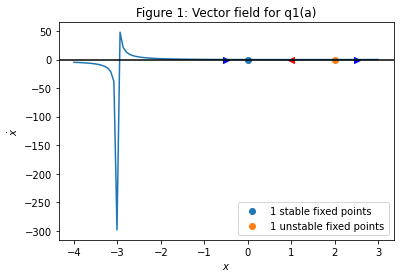

In [5]:
def q1_a(x):
    return x/5 - x/(3+x)
vector_field(q1_a, [-4, 3], root_estimates=[0, 2], arrows=[-0.5, 1, 2.5], title="Figure 1: Vector field for q1(a)")

/tmp/ipykernel_27332/662352101.py:3: RuntimeWarning: divide by zero encountered in true_divide
  return 1/5 - 3/(3+x)**2


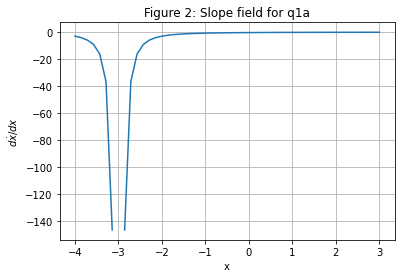

In [6]:
# slope field
def q1_a_diff(x):
    return 1/5 - 3/(3+x)**2
x = np.linspace(-4, 3)
y = q1_a_diff(x)
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("$d\dot{x}/dx$")
plt.title("Figure 2: Slope field for q1a")
plt.grid()
plt.show()

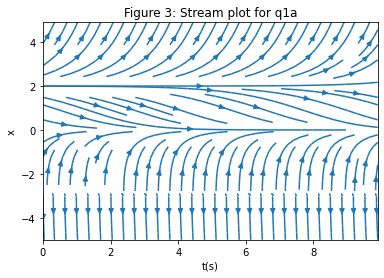

In [7]:
stream_plot(q1_a, x_scale=0.1, title="Figure 3: Stream plot for q1a", ylabel="x")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


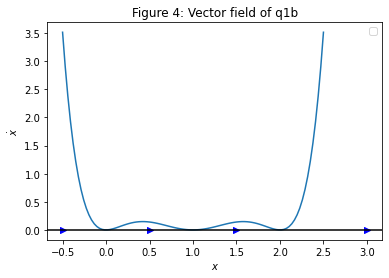

In [8]:
def q1_b(x):
    return x**2*(x-1)**2*(x-2)**2
vector_field(q1_b, [-0.5, 2.5], root_estimates=[0, 1, 2], arrows=[-0.5, 0.5, 1.5, 3], title="Figure 4: Vector field of q1b", fp=False)

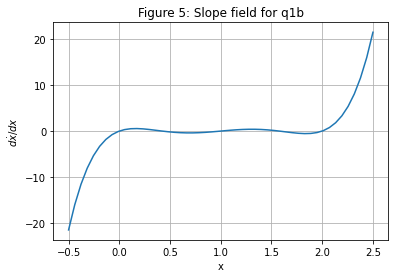

In [11]:
# slope field
def q1_b_diff(x):
    return derivative(q1_b, x, dx=0.01)
x = np.linspace(-0.5, 2.5)
y = q1_b_diff(x)
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("$d\dot{x}/dx$")
plt.title("Figure 5: Slope field for q1b")
plt.grid()
plt.show()

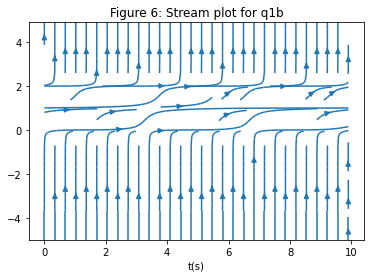

In [10]:
stream_plot(q1_b, x_scale=0.1, title="Figure 6: Stream plot for q1b")

# Q3

unstable fixed points: [0.0]


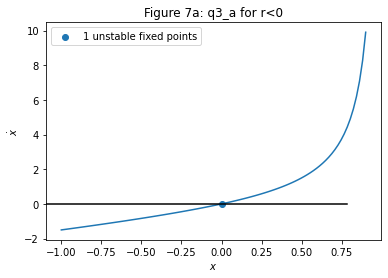

stable fixed points: [-1.0]
unstable fixed points: [0.0]


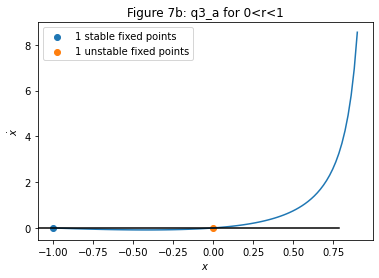

unstable fixed points: [0.0]


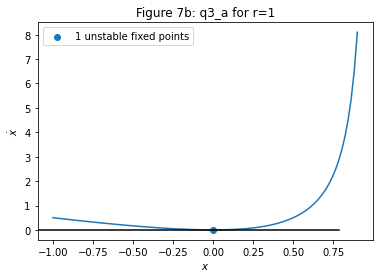

stable fixed points: [0.0]
unstable fixed points: [0.3333333333333334]


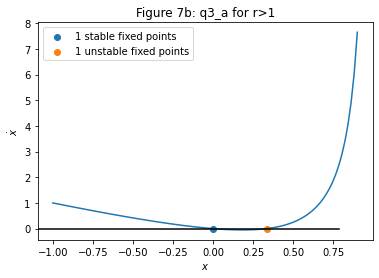

In [30]:
def q3_a(x, r):
    return x/(1-x) - r*x
vector_field(q3_a, x_range=[-1, 0.9], args=[-1], title="Figure 7a: q3_a for r<0", root_estimates=[0])
vector_field(q3_a, x_range=[-1, 0.9], args=[0.5], title="Figure 7b: q3_a for 0<r<1", root_estimates=[-1, 0])
vector_field(q3_a, x_range=[-1, 0.9], args=[1], title="Figure 7b: q3_a for r=1", root_estimates=[0])
vector_field(q3_a, x_range=[-1, 0.9], args=[1.5], title="Figure 7b: q3_a for r>1", root_estimates=[0, 0.5])

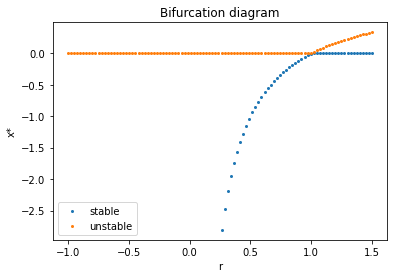

In [33]:
bifurcation_diagram(q3_a, r_range=[-1, 1.5], x_range=[-1, 0.9], root_estimates=[-1, 0.5])